# Selections

**Learning Objective:** Use selections to add interactivity to charts, through data queries, conditional encodings, data filtering, etc.

These examples are taken from the Altair documentation:

https://altair-viz.github.io/user_guide/selections.html

In [2]:
import altair as alt
alt.data_transformers.enable('json')
from vega_datasets import data

## Example: linked-brush scatter plot

Let's work through adding interactivity to a basic scatter plot. Here is the initial scatter plot with the cars dataset:

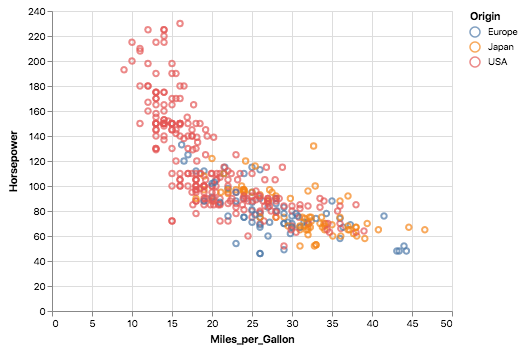

In [3]:
cars = data.cars.url

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
)

All interactions begin with a selection object. Here we create a selection of type *interval*, which will allow the user to select a range of data..

In [4]:
brush = alt.selection_interval()  # selection of type "interval"

Then selection can then be added to the chart as follows:

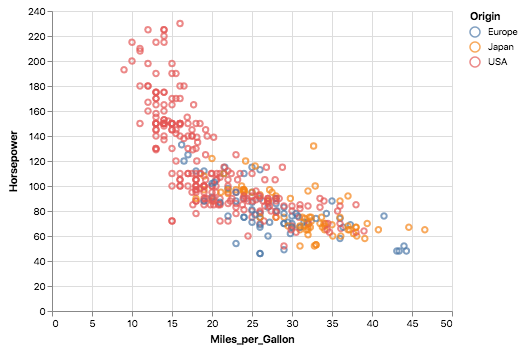

In [5]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
).properties(
    selection=brush
)

Now that the chart knows about the selection, we can do conditional encoding, to color the selected points differently from the unselected ones:

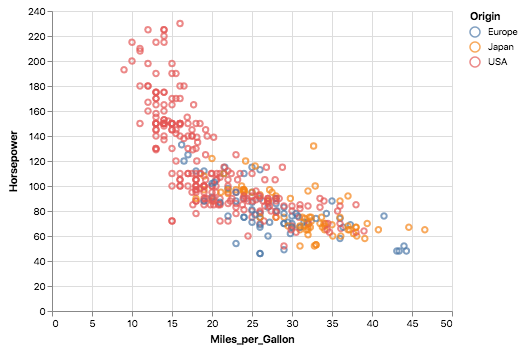

In [6]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    selection=brush
)

Selection link across different subcharts:

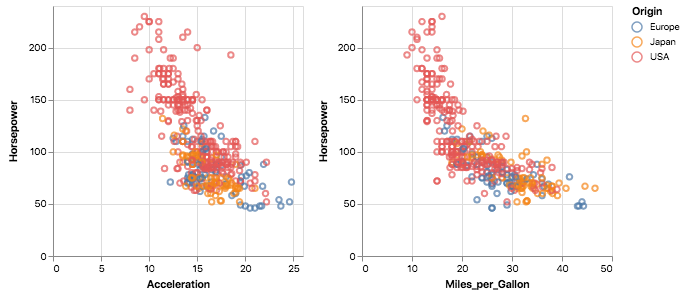

In [7]:
chart = alt.Chart(cars).mark_point().encode(
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250,
    selection=brush
)

chart.encode(x='Acceleration:Q') | chart.encode(x='Miles_per_Gallon:Q')

The selection can be modified to only affect the x encoding:

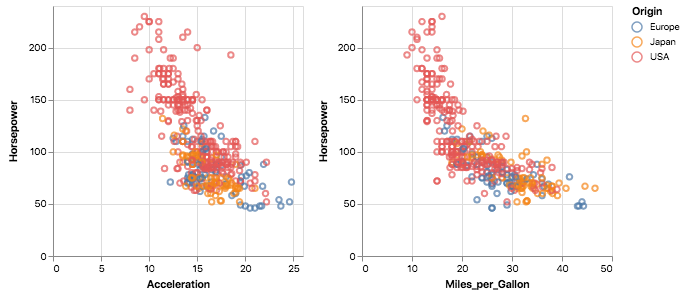

In [8]:
brush = alt.selection_interval(encodings=['x'])

chart = alt.Chart(cars).mark_point().encode(
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250,
    selection=brush
)

chart.encode(x='Acceleration:Q') | chart.encode(x='Miles_per_Gallon:Q')

## Selection types: interval, single, multi

In [9]:
def make_example(selector):
    cars = data.cars.url

    return alt.Chart(cars).mark_rect().encode(
        x="Cylinders:O",
        y="Origin:N",
        color=alt.condition(selector, 'count()', alt.value('lightgray'))
    ).properties(
        width=300,
        height=180,
        selection=selector
    )

### Interval selections

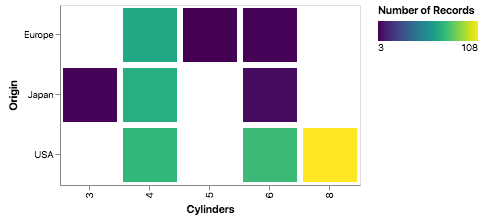

In [10]:
interval = alt.selection_interval()
make_example(interval)

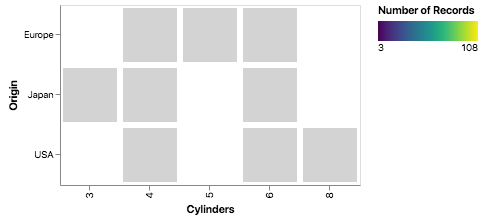

In [11]:
interval_x = alt.selection_interval(encodings=['x'], empty='none')
make_example(interval_x)

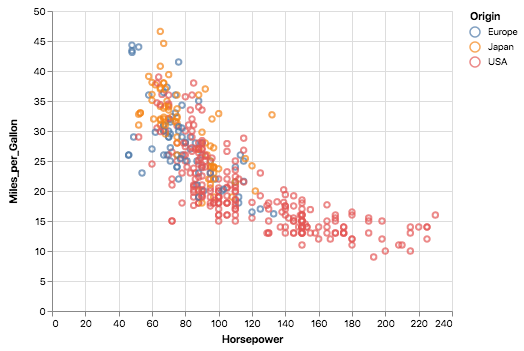

In [12]:
scales = alt.selection_interval(bind='scales')

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
).properties(
    selection=scales
)

## Single selections

A *single* selection enables a user to select a single mark or data point using mouse actions.

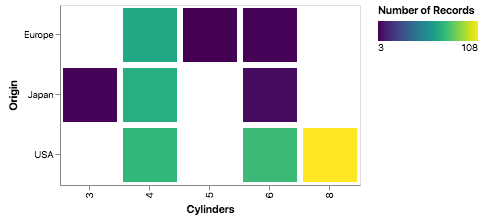

In [13]:
single = alt.selection_single()
make_example(single)

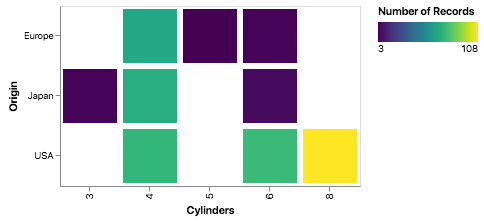

In [14]:
single_nearest = alt.selection_single(on='mouseover', nearest=True)
make_example(single_nearest)

### Multiple selections

A *multiple* selection enables you to select multiple marks or data points on a chart using mouse actions.

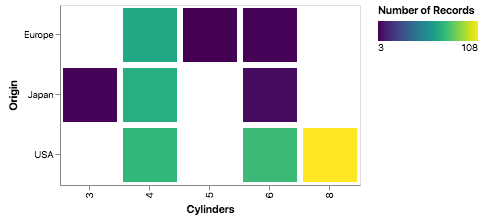

In [15]:
multi = alt.selection_multi()
make_example(multi)

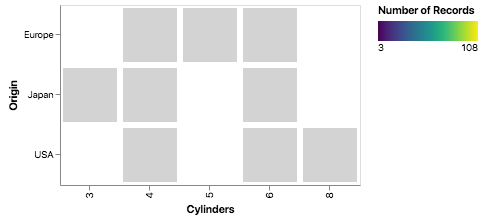

In [16]:
multi_mouseover = alt.selection_multi(on='mouseover', toggle=False, empty='none')
make_example(multi_mouseover)